In [258]:
import pandas as pd
import statistics as stat
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def print_stats_county(data, state, data_type, county):
    '''
    Prints mean, median, and mode about the
    given dataset.
    :param data: A list containing the data.
    :param country: The name of the country 
    the data belongs to.
    :param data_type: What type of data is
    contained in data.
    '''
    
    print('%s %s county weekly %s mean: %15.2f' % (state, county, data_type, stat.mean(data)))
    print('%s %s county weekly %s median: %13.2f' % (state, county, data_type, stat.median(data)))
    print('%s %s county weekly %s mode: %15.2f' % (state, county, data_type, stat.mode(data)))

In [18]:
def print_stats(data, country, data_type):
    '''
    Prints mean, median, and mode about the
    given dataset.
    :param data: A list containing the data.
    :param country: The name of the country 
    the data belongs to.
    :param data_type: What type of data is
    contained in data.
    '''
    
    print('%s weekly %s mean: %15.2f' % (country, data_type, stat.mean(data)))
    print('%s weekly %s median: %13.2f' % (country, data_type, stat.median(data)))
    print('%s weekly %s mode: %15.2f' % (country, data_type, stat.mode(data)))

In [154]:


base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
nc_cases = base[base["State"].str.contains("NC")]

nc_population = nc_cases['population'].sum()

# get start and end indices
start_index = nc_cases.columns.get_loc("cases 2022-06-01")
end_index = nc_cases.columns.get_loc("cases 2022-12-31")

# get a df with the dates of the weeks
weeks = []
j = 7
for i in range(start_index, end_index):
    if j % 7 == 0:
        numeric_date = nc_cases.columns[i]
        numeric_date = numeric_date[-5:]
        weeks.append(numeric_date)
    j+=1
    
curr = 0



nc_weekly_cases_df = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = nc_cases.columns[i]
        prev_col = nc_cases.columns[i-7]
        curr_week = nc_cases[curr_col].sum()
        prev_week = nc_cases[prev_col].sum()
        nc_weekly_cases_df.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j+=1
    
# get mean median and mode
print_stats(nc_weekly_cases_df, "North Carolina", "cases")

North Carolina weekly cases mean:        18447.00
North Carolina weekly cases median:      20481.00
North Carolina weekly cases mode:            0.00


In [155]:
base = pd.read_csv('../Data/base_set_joined.csv')
nc_deaths = base[base["State"].str.contains("NC")]

# get start and end indices
start_index = temp.columns.get_loc("deaths 2022-06-01")
end_index = temp.columns.get_loc("deaths 2022-12-31")

curr = 0

nc_weekly_deaths_df = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = nc_deaths.columns[i]
        prev_col = nc_deaths.columns[i-7]
        curr_week = nc_deaths[curr_col].sum()
        prev_week = nc_deaths[prev_col].sum()
        nc_weekly_deaths_df.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j += 1
    
nc_deaths_normalized = []

for data in nc_weekly_deaths_df:
    nc_deaths_normalized.append(data / nc_population * 100000)
    
# get mean median and mode
print_stats(nc_weekly_deaths_df, "North Carolina", "deaths")


North Carolina weekly deaths mean:           96.00
North Carolina weekly deaths median:         46.00
North Carolina weekly deaths mode:            0.00


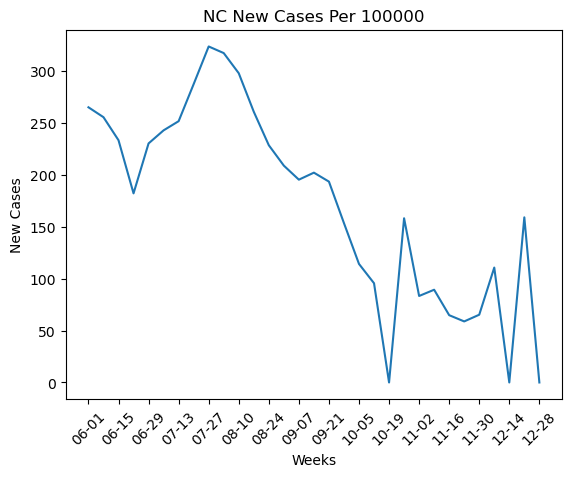

In [90]:
# NC Normalized Data

# normalize US cases data and log the data
nc_cases_normalized = []

for data in nc_weekly_cases_df:
    nc_cases_normalized.append(data / nc_population * 100000)


plt.plot(weeks, nc_cases_normalized)
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('NC New Cases Per 100000')
plt.xticks(weeks[::2], rotation = 45)
plt.show()

In [156]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
tx_cases = base[base["State"].str.contains("TX")]

tx_population = tx_cases['population'].sum()

# get start and end indices
start_index = tx_cases.columns.get_loc("cases 2022-06-01")
end_index = tx_cases.columns.get_loc("cases 2022-12-31")


tx_weekly_cases_df = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = tx_cases.columns[i]
        prev_col = tx_cases.columns[i-7]
        curr_week = tx_cases[curr_col].sum()
        prev_week = tx_cases[prev_col].sum()
        tx_weekly_cases_df.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j+=1

tx_cases_normalized = []
for data in tx_weekly_cases_df:
    tx_cases_normalized.append(data / tx_population * 100000)

# get mean median and mode
print_stats(tx_weekly_cases_df, "Texas", "cases")


Texas weekly cases mean:        37495.00
Texas weekly cases median:      32205.00
Texas weekly cases mode:            0.00


In [157]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
tx_deaths = base[base["State"].str.contains("TX")]

start_index = tx_deaths.columns.get_loc("deaths 2022-06-01")
end_index = tx_deaths.columns.get_loc("deaths 2022-12-31")

curr = 0

tx_weekly_deaths_df = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = tx_deaths.columns[i]
        prev_col = tx_deaths.columns[i-7]
        curr_week = tx_deaths[curr_col].sum()
        prev_week = tx_deaths[prev_col].sum()
        tx_weekly_deaths_df.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j += 1
#Normalize data for later
tx_deaths_normalized = []
for data in tx_weekly_deaths_df:
    tx_deaths_normalized.append(data / tx_population * 100000)

# get mean median and mode
print_stats(tx_weekly_deaths_df, "Texas", "deaths")

Texas weekly deaths mean:           98.00
Texas weekly deaths median:         83.00
Texas weekly deaths mode:            0.00


In [158]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
fl_cases = base[base["State"].str.contains("FL")]

fl_population = fl_cases['population'].sum()

# get start and end indices
start_index = fl_cases.columns.get_loc("cases 2022-06-01")
end_index = fl_cases.columns.get_loc("cases 2022-12-31")


fl_weekly_cases_df = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = fl_cases.columns[i]
        prev_col = fl_cases.columns[i-7]
        curr_week = fl_cases[curr_col].sum()
        prev_week = fl_cases[prev_col].sum()
        fl_weekly_cases_df.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j+=1

fl_cases_normalized = []
for data in fl_weekly_cases_df:
    fl_cases_normalized.append(data / fl_population * 100000)

# get mean median and mode
print_stats(fl_weekly_cases_df, "Florida", "cases")

Florida weekly cases mean:        37359.00
Florida weekly cases median:      36555.00
Florida weekly cases mode:            0.00


In [159]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
fl_deaths = base[base["State"].str.contains("FL")]

start_index = fl_deaths.columns.get_loc("deaths 2022-06-01")
end_index = fl_deaths.columns.get_loc("deaths 2022-12-31")

curr = 0

fl_weekly_deaths_df = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = fl_deaths.columns[i]
        prev_col = fl_deaths.columns[i-7]
        curr_week = fl_deaths[curr_col].sum()
        prev_week = fl_deaths[prev_col].sum()
        fl_weekly_deaths_df.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j += 1
    

fl_deaths_normalized = []
for data in fl_weekly_deaths_df:
    fl_deaths_normalized.append(data / fl_population * 100000)

    
# get mean median and mode
print_stats(fl_weekly_deaths_df, "Florida", "deaths")

Florida weekly deaths mean:          295.00
Florida weekly deaths median:        351.00
Florida weekly deaths mode:            0.00


In [160]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
va_cases = base[base["State"].str.contains("VA")]

va_population = va_cases['population'].sum()

# get start and end indices
start_index = va_cases.columns.get_loc("cases 2022-06-01")
end_index = va_cases.columns.get_loc("cases 2022-12-31")


va_weekly_cases_df = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = va_cases.columns[i]
        prev_col = va_cases.columns[i-7]
        curr_week = va_cases[curr_col].sum()
        prev_week = va_cases[prev_col].sum()
        va_weekly_cases_df.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j+=1

va_cases_normalized = []
for data in va_weekly_cases_df:
    va_cases_normalized.append(data / va_population * 100000)    

# get mean median and mode
print_stats(va_weekly_cases_df, "Virginia", "cases")

Virginia weekly cases mean:         9930.00
Virginia weekly cases median:      10045.00
Virginia weekly cases mode:        14566.00


In [161]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
va_deaths = base[base["State"].str.contains("VA")]

start_index = va_deaths.columns.get_loc("deaths 2022-06-01")
end_index = va_deaths.columns.get_loc("deaths 2022-12-31")

curr = 0

va_weekly_deaths_df = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = va_deaths.columns[i]
        prev_col = va_deaths.columns[i-7]
        curr_week = va_deaths[curr_col].sum()
        prev_week = va_deaths[prev_col].sum()
        va_weekly_deaths_df.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j += 1
    
va_deaths_normalized = []
for data in va_weekly_deaths_df:
    va_deaths_normalized.append(data / va_population * 100000)    
    
# get mean median and mode
print_stats(va_weekly_deaths_df, "Virginia", "deaths")

Virginia weekly deaths mean:           54.00
Virginia weekly deaths median:         57.00
Virginia weekly deaths mode:           55.00


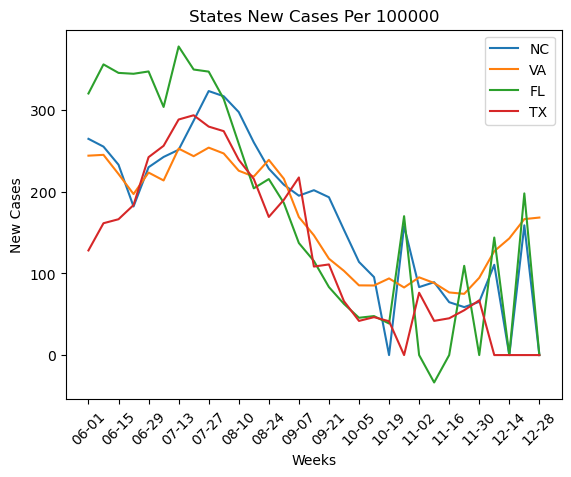

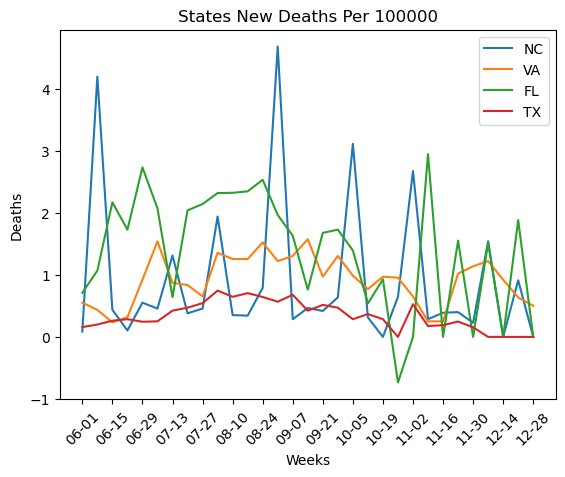

In [162]:



# Cases
plt.plot(weeks, nc_cases_normalized, label = "NC")
plt.plot(weeks, va_cases_normalized, label = "VA")
plt.plot(weeks, fl_cases_normalized, label = "FL")
plt.plot(weeks, tx_cases_normalized, label = "TX")
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('States New Cases Per 100000')
plt.xticks(weeks[::2], rotation = 45)
plt.legend()
plt.show()

# Deaths
plt.plot(weeks, nc_deaths_normalized, label = "NC")
plt.plot(weeks, va_deaths_normalized, label = "VA")
plt.plot(weeks, fl_deaths_normalized, label = "FL")
plt.plot(weeks, tx_deaths_normalized, label = "TX")
plt.xlabel('Weeks')
plt.ylabel('Deaths')
plt.title('States New Deaths Per 100000')
plt.xticks(weeks[::2], rotation = 45)
plt.legend()
plt.show()

<img src="https://www.statista.com/graphic/1/1102816/coronavirus-covid19-cases-number-us-americans-by-day.jpg" alt="wah" />



Each state I picked for this analysis have somewhat similar, but also very different patterns in increases and decreases of deaths and cases. 

Most of the states follow a very close pattern when normalized. Florida however pulls ahead in most instances, with North Carolina not too far behind. The reason for Florida's high rate of cases is multifactorial. The primary one being that Florida is the vacation hotspot of the East Coast, with such attractions such as beaches that are warm enough to swim in year round, Disney World, and cities well known for partying. This means that people, who are potentially ill without knowing from the world round are traveling to Florida, you can see some basic statistics for Florida tourism <a href="https://www.visitflorida.org/resources/research/research-faq/#:~:text=Preliminary%20figures%20indicate%20domestic%20travel,to%20the%20state%20in%202022."> here</a>. Florida also has a high elderly population,  which was particularly susceptible to covid, which leads to their high death rate. 

North Carolina had a relatively high rate as of new cases and deaths as well. This can largely be explained by the urban focus in North Carolinas population. Most of the states population lives in Charlotte, Greensboro, Raleigh, High Point etc. So a large majority of the state tends to go to work in cities, live in cities, or interact with people who do. Its death rate can be explained by North Carolinas high elderly population, and high obesity rates. 

Virginia had a relatively low rate of new cases and deaths. This is because of its low population density in most areas, as well as its general lack of tourism outside of Arlington County and (technically) Washington D.C.. Its also easily explained by the fact that 73.8% of the population is fully vaccinated, which can be seen <a href="https://www.vdh.virginia.gov/coronavirus/see-the-numbers/covid-19-in-virginia/covid-19-vaccine-summary/."> here.</a>

Texas has teh lowest rate of deaths and cases, which is somewhat confusing. They have a decent rate of vaccination, but not as high as Virginia, 63% of the population being full vaccinated, which can be seen <a href="https://usafacts.org/visualizations/covid-vaccine-tracker-states/state/texas."> here.</a> It also has very dense urban centers, as well as being a hot spot for immigration through Mexico.  

Each state follows the pattern of the United States as a whole (pictured above), waning towards the end of the beginning of summer after a high peak and peaking again during Winter holidays such as Thanksgiving and especially Christmas. 


### Florida's Three Biggest Counties

In [247]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
fl_cases = base[base["State"].str.contains("FL")]

fl_cases_county_1 = fl_cases[fl_cases["County Name"].str.contains("Miami-Dade County")]

fl_1_population = fl_cases_county_1['population'].sum()

start_index = fl_deaths.columns.get_loc("cases 2022-06-01")
end_index = fl_deaths.columns.get_loc("cases 2022-12-31")

curr = 0

fl_weekly_cases_df_1 = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = fl_cases_county_1.columns[i]
        prev_col = fl_cases_county_1.columns[i-7]
        curr_week = fl_cases_county_1[curr_col].sum()
        prev_week = fl_cases_county_1[prev_col].sum()
        fl_weekly_cases_df_1.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j += 1

raw_cases_1 = fl_weekly_cases_df_1

fl_cases_normalized_1 = []
for data in fl_weekly_cases_df_1:
    fl_cases_normalized_1.append(data / fl_1_population * 10000)

fl_cases_normalized_1 = np.log10(fl_cases_normalized_1)

# get mean median and mode
print_stats(fl_weekly_cases_df_1, "Miami-Dade County", "Cases")

Miami-Dade County weekly Cases mean:         8116.00
Miami-Dade County weekly Cases median:          0.00
Miami-Dade County weekly Cases mode:            0.00


C:\Users\Cole Yonkers\AppData\Local\Temp\ipykernel_46880\1042405815.py:34: RuntimeWarning: divide by zero encountered in log10
  fl_cases_normalized_1 = np.log10(fl_cases_normalized_1)


In [235]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
fl_deaths = base[base["State"].str.contains("FL")]

fl_deaths_county_1 = fl_deaths[fl_deaths["County Name"].str.contains("Miami-Dade County")]

start_index = fl_deaths.columns.get_loc("deaths 2022-06-01")
end_index = fl_deaths.columns.get_loc("deaths 2022-12-31")

curr = 0

fl_weekly_deaths_df_1 = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = fl_deaths_county_1.columns[i]
        prev_col = fl_deaths_county_1.columns[i-7]
        curr_week = fl_deaths_county_1[curr_col].sum()
        prev_week = fl_deaths_county_1[prev_col].sum()
        fl_weekly_deaths_df_1.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j += 1
    
raw_deaths_1 = fl_weekly_deaths_df_1
    
fl_deaths_normalized_1 = []
for data in fl_weekly_deaths_df_1:
    fl_deaths_normalized_1.append(data / fl_1_population * 10000)

fl_deaths_lognormalized_1 = np.log10(fl_deaths_normalized_1)
    
# get mean median and mode
print_stats(fl_weekly_deaths_df_1, "Miami-Dade County", "deaths")

Miami-Dade County weekly deaths mean:            0.00
Miami-Dade County weekly deaths median:          0.00
Miami-Dade County weekly deaths mode:            0.00


C:\Users\Cole Yonkers\AppData\Local\Temp\ipykernel_46880\4137417459.py:32: RuntimeWarning: divide by zero encountered in log10
  fl_deaths_lognormalized_1 = np.log10(fl_deaths_normalized_1)


In [248]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
fl_cases = base[base["State"].str.contains("FL")]

fl_cases_county_2 = fl_cases[fl_cases["County Name"].str.contains("Broward County")]

fl_2_population = fl_cases_county_2['population'].sum()

start_index = fl_deaths.columns.get_loc("cases 2022-06-01")
end_index = fl_deaths.columns.get_loc("cases 2022-12-31")

curr = 0

fl_weekly_cases_df_2 = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = fl_cases_county_2.columns[i]
        prev_col = fl_cases_county_2.columns[i-7]
        curr_week = fl_cases_county_2[curr_col].sum()
        prev_week = fl_cases_county_2[prev_col].sum()
        fl_weekly_cases_df_2.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j += 1
    
raw_cases_2 = fl_weekly_cases_df_2

fl_cases_normalized_2 = []
for data in fl_weekly_cases_df_2:
    fl_cases_normalized_2.append(data / fl_2_population * 10000)

fl_cases_normalized_2 = np.log10(fl_cases_normalized_2)
   
# get mean median and mode
print_stats(fl_weekly_cases_df_2, "Broward County", "Cases")

[      -inf 1.93268729       -inf 1.92225352       -inf 1.8852067
       -inf 1.84355612       -inf 1.83034856       -inf 1.73305217
       -inf 1.57916533       -inf 1.48553964       -inf 1.28303082
       -inf 1.03793058       -inf 0.99083501       -inf 1.04239116
       -inf 1.0944169        -inf 1.2108172        -inf 1.3889567
       -inf]
Broward County weekly Cases mean:         3843.00
Broward County weekly Cases median:          0.00
Broward County weekly Cases mode:            0.00


C:\Users\Cole Yonkers\AppData\Local\Temp\ipykernel_46880\3219169416.py:34: RuntimeWarning: divide by zero encountered in log10
  fl_cases_normalized_2 = np.log10(fl_cases_normalized_2)


In [237]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
fl_deaths = base[base["State"].str.contains("FL")]

fl_deaths_county_2 = fl_deaths[fl_deaths["County Name"].str.contains("Broward County")]

start_index = fl_deaths.columns.get_loc("deaths 2022-06-01")
end_index = fl_deaths.columns.get_loc("deaths 2022-12-31")

curr = 0

fl_weekly_deaths_df_2 = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = fl_deaths_county_2.columns[i]
        prev_col = fl_deaths_county_2.columns[i-7]
        curr_week = fl_deaths_county_2[curr_col].sum()
        prev_week = fl_deaths_county_2[prev_col].sum()
        fl_weekly_deaths_df_2.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j += 1
    
raw_deaths_2 = fl_weekly_deaths_df_2
    
fl_deaths_normalized_2 = []
for data in fl_weekly_deaths_df_2:
    fl_deaths_normalized_2.append(data / fl_2_population * 10000)

fl_deaths_normalized_2 = np.log10(fl_deaths_normalized_2)
    
# get mean median and mode
print_stats(fl_weekly_deaths_df_2, "Broward County", "deaths")

Broward County weekly deaths mean:            0.00
Broward County weekly deaths median:          0.00
Broward County weekly deaths mode:            0.00


C:\Users\Cole Yonkers\AppData\Local\Temp\ipykernel_46880\3059946795.py:32: RuntimeWarning: divide by zero encountered in log10
  fl_deaths_lognormalized_2 = np.log10(fl_deaths_normalized_2)


In [249]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
fl_cases = base[base["State"].str.contains("FL")]

fl_cases_county_3 = fl_cases[fl_cases["County Name"].str.contains("Palm Beach County")]

fl_3_population = fl_cases_county_3['population'].sum()

start_index = fl_deaths.columns.get_loc("cases 2022-06-01")
end_index = fl_deaths.columns.get_loc("cases 2022-12-31")

curr = 0

fl_weekly_cases_df_3 = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = fl_cases_county_3.columns[i]
        prev_col = fl_cases_county_3.columns[i-7]
        curr_week = fl_cases_county_3[curr_col].sum()
        prev_week = fl_cases_county_3[prev_col].sum()
        fl_weekly_cases_df_3.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j += 1
    
raw_cases_3 = fl_weekly_cases_df_3
fl_cases_normalized_3 = []
for data in fl_weekly_cases_df_3:
    fl_cases_normalized_3.append(data / fl_3_population * 10000)

fl_cases_normalized_3 = np.log10(fl_cases_normalized_3)
    
# get mean median and mode
print_stats(fl_weekly_cases_df_3, "Palm Beach County", "Cases")

Palm Beach County weekly Cases mean:         2499.00
Palm Beach County weekly Cases median:          0.00
Palm Beach County weekly Cases mode:            0.00


C:\Users\Cole Yonkers\AppData\Local\Temp\ipykernel_46880\4290852326.py:33: RuntimeWarning: divide by zero encountered in log10
  fl_cases_normalized_3 = np.log10(fl_cases_normalized_3)


In [239]:
base = pd.read_csv('../Data/base_set_joined.csv')

# get state population
fl_deaths = base[base["State"].str.contains("FL")]

fl_deaths_county_3 = fl_deaths[fl_deaths["County Name"].str.contains("Palm Beach County")]

start_index = fl_deaths.columns.get_loc("deaths 2022-06-01")
end_index = fl_deaths.columns.get_loc("deaths 2022-12-31")

curr = 0

fl_weekly_deaths_df_3 = []
j = 7

for i in range(start_index, end_index):
    if j % 7 == 0:
        curr_col = fl_deaths_county_3.columns[i]
        prev_col = fl_deaths_county_3.columns[i-7]
        curr_week = fl_deaths_county_3[curr_col].sum()
        prev_week = fl_deaths_county_3[prev_col].sum()
        fl_weekly_deaths_df_3.append(curr_week-prev_week)
        curr += (curr_week - prev_week)
    j += 1
    
raw_deaths_3 = fl_weekly_deaths_df_3
fl_deaths_normalized_3 = []
for data in fl_weekly_deaths_df_3:
    fl_deaths_normalized_3.append(data / fl_3_population * 10000)

fl_deaths_normalized_3 = np.log10(fl_deaths_normalized_3)

# get mean median and mode
print_stats(fl_weekly_deaths_df_3, "Palm Beach County", "deaths")


Palm Beach County weekly deaths mean:            0.00
Palm Beach County weekly deaths median:          0.00
Palm Beach County weekly deaths mode:            0.00


C:\Users\Cole Yonkers\AppData\Local\Temp\ipykernel_46880\170917257.py:31: RuntimeWarning: divide by zero encountered in log10
  fl_deaths_normalized_3 = np.log10(fl_deaths_normalized_3)


[      -inf 2.11465323       -inf 2.08304984       -inf 2.08696646
       -inf 2.04211372       -inf 2.01093224       -inf 1.90235967
       -inf 1.74406202       -inf 1.66203013       -inf 1.42022599
       -inf 1.19328581       -inf 1.1183448        -inf 1.17965609
       -inf 1.23542279       -inf 1.45009202       -inf 1.63395731
       -inf]


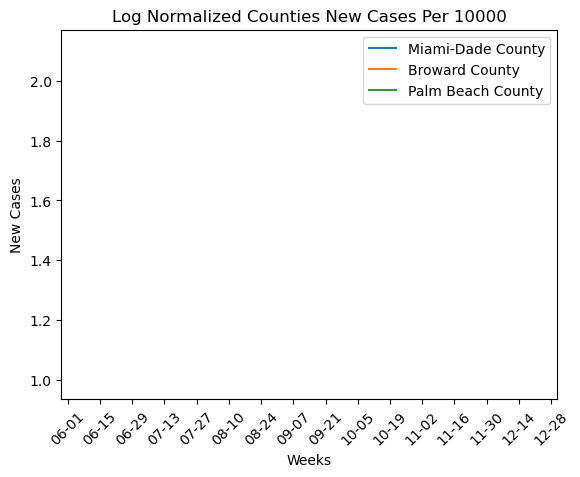

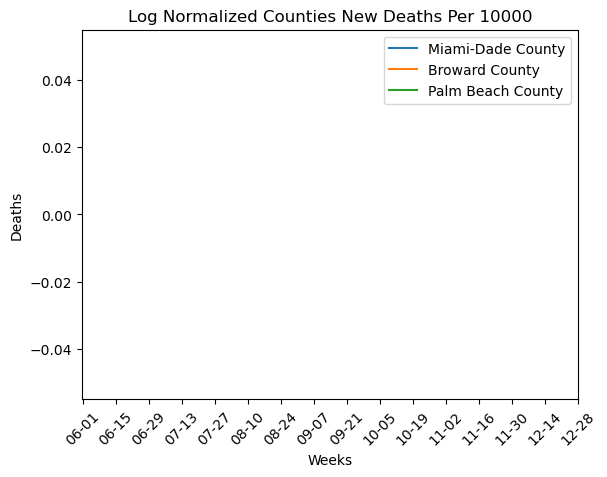

In [259]:
print(fl_cases_normalized_1)


# Cases
plt.plot(weeks, fl_cases_normalized_1, label = "Miami-Dade County")
plt.plot(weeks, fl_cases_normalized_2, label = "Broward County")
plt.plot(weeks, fl_cases_normalized_3, label = "Palm Beach County")
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('Log Normalized Counties New Cases Per 10000')
plt.xticks(weeks[::2], rotation = 45)
plt.legend()
plt.show()

# Deaths
plt.plot(weeks, fl_deaths_normalized_3, label = "Miami-Dade County")
plt.plot(weeks, fl_deaths_normalized_3, label = "Broward County")
plt.plot(weeks, fl_deaths_normalized_3, label = "Palm Beach County")
plt.xlabel('Weeks')
plt.ylabel('Deaths')
plt.title('Log Normalized Counties New Deaths Per 10000')
plt.xticks(weeks[::2], rotation = 45)
plt.legend()
plt.show()

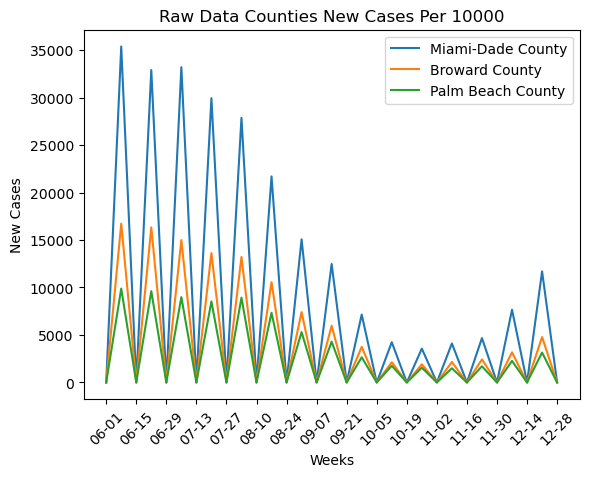

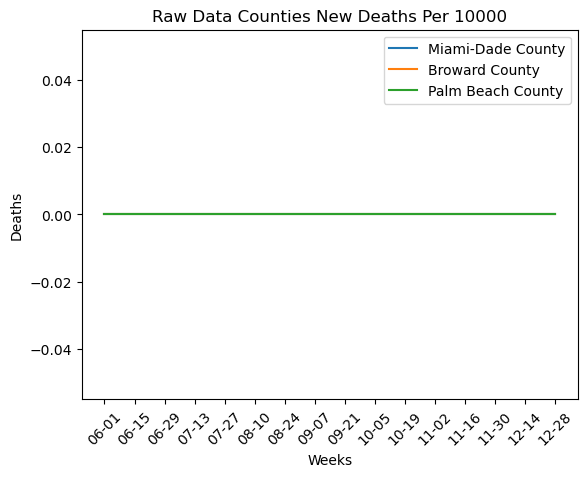

In [241]:
# Cases
plt.plot(weeks, raw_cases_1 , label = "Miami-Dade County")
plt.plot(weeks, raw_cases_2 , label = "Broward County")
plt.plot(weeks, raw_cases_3 , label = "Palm Beach County")
plt.xlabel('Weeks')
plt.ylabel('New Cases')
plt.title('Raw Data Counties New Cases Per 10000')
plt.xticks(weeks[::2], rotation = 45)
plt.legend()
plt.show()

# Deaths
plt.plot(weeks, raw_deaths_1, label = "Miami-Dade County")
plt.plot(weeks, raw_deaths_2 , label = "Broward County")
plt.plot(weeks, raw_deaths_3 , label = "Palm Beach County")
plt.xlabel('Weeks')
plt.ylabel('Deaths')
plt.title('Raw Data Counties New Deaths Per 10000')
plt.xticks(weeks[::2], rotation = 45)
plt.legend()
plt.show()

### Counties Report

The counties I picked in Florida were the three biggest, all having major tourist industries which should bring in a significant amount of cases. While it does have a great many cases, there is an interesting miracle in the data. There were no covid related deaths in these counties despite thousands of cases in each every week. This means that the counties stopped reporting deaths sometime in the middle of 2022. 

The raw data looks very strange, and is obviously the result of faulty reporting by the counties. I cannot find a good reason for this, it just seems like they only sometimes wanted to report the data, and never wanted to report the deaths. The "peaks" of the data follow the general pattern of the state however. 